<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/SEO_Keyword_Analyzer_Using_Bag_of_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name:-** **SEO Keyword Analyzer Using Bag of Words**

**Objective:** The project aims to analyze the content of websites by identifying and emphasizing meaningful keywords. This helps website owners optimize their content for better search engine rankings, driving more traffic, and improving overall SEO performance.

**Purpose of the Project:-**

The purpose of this project is to analyze the text content of a website to identify the most frequently used meaningful keywords. By doing this, the tool helps website owners understand which keywords are being emphasized and whether these keywords align with their SEO strategy. This analysis can guide content optimization efforts to improve search engine rankings and attract more targeted traffic.



**Bag of Words (BoW) Concept**

Bag of Words (BoW) is a technique used in Natural Language Processing (NLP) to analyze and represent text data. It’s called "Bag of Words" because, in this approach, we treat text as a "bag" (or collection) of words, without considering the order or structure of the words.

**Key Idea:**



*   **Simplification:** BoW simplifies text by breaking it down into individual words.
*   **Frequency Counting:** It counts how many times each word appears in the text.






**Analyzing a Website for SEO**

Suppose a website owner wants to know which keywords are most common on their homepage.
**Using the BoW technique:**


1.   **Text Extraction:** The website’s text is extracted and broken down into individual words.
2.   **Word Counting:** The frequency of each word is counted.
3.   **Keyword Analysis:** By analyzing the most frequent words (after removing common words like "the", "and", etc.), the owner can see which topics are emphasized. If important keywords are missing or underrepresented, the owner can adjust the content to improve search engine rankings.

For example, if a cooking website frequently uses words like "recipe", "cook", "ingredients", it shows that the site is correctly targeting those keywords. If these words were missing, the owner might want to add more content related to recipes to attract more visitors.





In [ ]:
# Import Necessary libraries.
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
url= 'https://thatware.co/'

# Send an HTTP request to the website
response = requests.get(url)

# Parse the website's HTML content
soup = BeautifulSoup(response.content, 'html.parser')
soup




<!DOCTYPE html>

<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-US"> <![endif]-->
<!--[if gt IE 9]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head><meta charset="utf-8"/><script>if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}</script><script>(()=>{class RocketLazyLoadScripts{constructor(){this.v="1.2.6",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this.t.bind(this),this.touchStartHandler=this.i.bind(this),this.touchMoveHandler=this.o.bind(this),this.touchEndHandler=th

**get_text():** This is a method provided by BeautifulSoup that extracts all the text from the HTML content stored in the soup variable

In [ ]:
# Extract the text from the webpage.
text = soup.get_text()
text

'\n\n  \n\n\n\n\n\n\n\nTHATWARE® - AI Powered SEO & Best Advanced SEO Agency\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSERVICES\n\nAdvanced SEO\nADVANCED DIGITAL MARKETING\nADVANCED LINK BUILDING\nFULLY MANAGED SEO\nBUSINESS INTELLIGENCE\nPAID MARKETING\nGoogle penalty recovery\nConversion Rate Optimization\nSOCIAL MEDIA MARKETING\nInformation Retrieval & NLP Services\nMarket Research Services\nCompetitor Keyword Analysis and Research Services\nContent Writing Services\nContent Proofreading Services\nWeb Development Services\nGraphic Design Services\nTechnology Consulting Services\nAWS Managed Services\nWebsite Maintenance Services\nBug and Software Testing Services\nCustom Software Development Services (SAAS)\nMobile and Web App Services\nUX Design Services\nUI Services\nChatbot Services\nWebsite Design Services\n\n\nWhy AI ?\nOUR COMPANY\n\nABOUT\nHOW IT WORKS\nHOW WE MANAGE\nCAREER\nABOUT AUT

**text.split():** This splits the text into a list of words, using any amount of whitespace (spaces, tabs, newlines) as the delimiter.

text="   Welcome   to   my   website   \n\nThis   is   a   paragraph   of   text.   "

text.split()= ["Welcome", "to", "my", "website", "This", "is", "a", "paragraph", "of", "text."]

**' '.join(...):** This joins the list of words back into a single string, using a single space character as the separator.

Then, the join() method will join the list of words back into a single string, using a single space character as the separator:

clean_text = ' '.join(text.split())

clean_text = "Welcome to my website This is a paragraph of text."




In [ ]:
# Clean up the text by removing extra spaces, line breaks, etc.
clean_text = ' '.join(text.split())
clean_text

'THATWARE® - AI Powered SEO & Best Advanced SEO Agency SERVICES Advanced SEO ADVANCED DIGITAL MARKETING ADVANCED LINK BUILDING FULLY MANAGED SEO BUSINESS INTELLIGENCE PAID MARKETING Google penalty recovery Conversion Rate Optimization SOCIAL MEDIA MARKETING Information Retrieval & NLP Services Market Research Services Competitor Keyword Analysis and Research Services Content Writing Services Content Proofreading Services Web Development Services Graphic Design Services Technology Consulting Services AWS Managed Services Website Maintenance Services Bug and Software Testing Services Custom Software Development Services (SAAS) Mobile and Web App Services UX Design Services UI Services Chatbot Services Website Design Services Why AI ? OUR COMPANY ABOUT HOW IT WORKS HOW WE MANAGE CAREER ABOUT AUTHOR SEO CASE STUDIES AI CASE STUDIES AI SEO BLUEPRINT AI-SEO Video Become Our Reseller Our Corporate Deck SEO FAQ’s for Clients FAQ BLOGS CONTACT Pricing 360 Degree SEO Package Enterprise SEO Prici

**CountVectorizer:** A Tool to Convert Text to Numbers.

**What is CountVectorizer?**

*   Imagine you have a tool that can read text and count how often each word appears. CountVectorizer is that tool in Python.
*   It converts text into a format that computers can understand—specifically, it turns text into a list of word counts.

**What Are Stop Words?**


*   Stop words are common words like "the", "and", "is", which usually don’t carry significant meaning in a sentence.
*   By setting stop_words='english', we tell the tool to ignore these common words, so we focus on the more important words.

**Example**
*   Suppose you have a sentence: "The cat sits on the mat."
*   Without removing stop words, "the" would be counted, but it doesn’t add much meaning. By removing stop words, we focus on words like "cat", "sits", and "mat".

**Fitting and Transforming Text into a Bag of Words Model**

X = vectorizer.fit_transform([text])

*   **Fit and Transform—What Does It Mean?**
  *   **"Fitting"** means that the tool learns from the text you provide. It identifies all the unique words in the text.
  *   **"Transforming"** means converting the text into numbers based on what was learned. Specifically, it counts how many times each word appears.

**Example:**
  *   If your text is "Cat mat cat mat cat", the tool will learn that there are two unique words: "cat" and "mat".
  *   Then it will transform the text into numbers, resulting in something like: {"cat": 3, "mat": 2}.















In [ ]:
# Use CountVectorizer to create the BoW model, removing stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text into a BoW model
X = vectorizer.fit_transform([text])
X


<1x773 sparse matrix of type '<class 'numpy.int64'>'
	with 773 stored elements in Compressed Sparse Row format>

**Converting the Bag of Words Model to a DataFrame**

**bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())**

*   **What’s a DataFrame?**
  *   A DataFrame is like a table in Excel. It’s a way to organize and display data neatly.

  *   In this case, the DataFrame will have words as columns and their counts as rows.

**Example:**
 *   Imagine your text is "apple banana apple orange". After processing, the DataFrame might look like this:

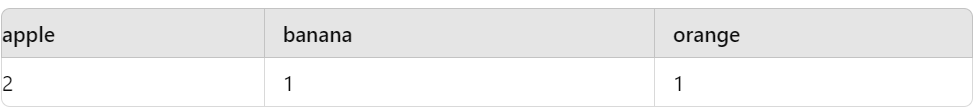

This table shows that "apple" appears 2 times, "banana" 1 time, and "orange" 1 time.









**bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())**
1.   **X.toarray()**
    *   **What It Does:** Converts the BoW matrix into a 2D NumPy array.
    *   **Why It's Needed:** The BoW model created by CountVectorizer is in a sparse matrix format, which is efficient for storing data but not very readable. toarray() converts it into a regular 2D array where each row represents a document, and each column represents a word.

**Example:**
  *   Suppose you have the following simple text document:

  "apple banana apple"
    *   The BoW model might be represented as a sparse matrix like this:

         [[2, 1]]

*   2 is the count for "apple" and 1 is the count for "banana".

2.   After toarray(), it becomes:
  
         [[2, 1]]

3. **vectorizer.get_feature_names_out()**

*   **What It Does:** Retrieves the list of words (features) that the CountVectorizer used.
*   **Why It's Needed:** This list of words is used to label the columns of the DataFrame. Each column corresponds to one of these words.

*   Example:

If your vocabulary from the text document was ['apple', 'banana'], get_feature_names_out() will return:
   
         ['apple', 'banana']


4.      **pd.DataFrame(...)**
    *   **What It Does:** Creates a DataFrame using the 2D array and the list of feature names.
    *   **Why It's Needed:** A DataFrame is a tabular format that's easier to read and manipulate compared to raw arrays. Each column represents a word, and each row represents a document (though here we have just one document).



*   **Example:**
   *   With the 2D array [[2, 1]] and the feature names ['apple', 'banana'], the DataFrame will look like this:

   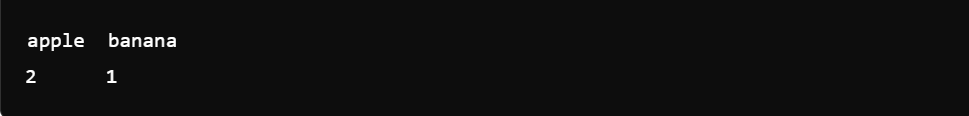

   




















In [ ]:
# Convert the BoW model into a DataFrame for easier analysis
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,000,000602,0064,00checkouts,08,1000,10000,104,140qualified,1500,...,workflow,works,world,worldwide,write,writing,xml,year,years,yes
0,1,1,1,1,1,2,2,1,1,2,...,1,1,2,2,1,3,2,1,2,2


**bow_df.sum(axis=0)**

**Understanding axis=0**

The axis parameter in pandas determines the direction along which a function like sum() operates.
   *   **axis=0:** This means you want to **sum down the columns.** So, for each column (which represents a word), you add up all the values in that column.

   *   axis=1: This would **sum across the rows.** In this case, it would add up all the word counts in each row (which is not what we want here).

**Why Use sum(axis=0)?**

In the BoW (Bag of Words) model, each column of the DataFrame represents the count of a particular word. Since we're interested in knowing how often each word appears in the entire document (or across multiple documents if there were more rows), we need to add up the counts in each column.

**Let's say you have a DataFrame that looks like this:**

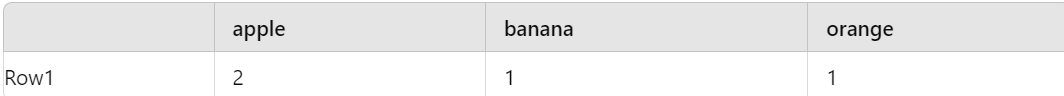

If you call bow_df.sum(axis=0), you are summing each column's values:
   *   **For the "apple" column:** The sum is 2.
   *   **For the "banana" column:** The sum is 1.
   *   **For the "orange" column:** The sum is 1.

   So, the result of sum(axis=0) would be:

   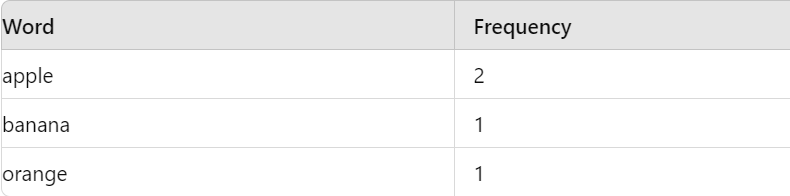
   
   
This tells you that "apple" appears 2 times, "banana" 1 time, and "orange" 1 time in the text. The axis=0 is crucial here because it sums down the columns to give you the total count of each word across the entire text.

   **Summary**
   *   **axis=0:** Adds up values in each column (which represents each word) to get the total frequency of that word across the entire text.

   *   This is important because it helps us find out which words are most common in the text, which can then be used to analyze keyword usage for SEO purposes.














In [ ]:
# Sort words by frequency in descending order
word_frequencies = bow_df.sum(axis=0).sort_values(ascending=False)
word_frequencies

,0
seo,122
services,52
ai,37
advanced,22
google,16
...,...
funnel,1
furjan,1
fusion,1
future,1


In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Extract Text Content from a Website
def get_website_text(url):
    try:
        # Send an HTTP request to the website
        response = requests.get(url)
        # Parse the website's HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the text from the webpage
        text = soup.get_text()

        # Clean up the text by removing extra spaces, line breaks, etc.
        clean_text = ' '.join(text.split())

        return clean_text
    except Exception as e:
        print(f"Failed to retrieve content from {url}: {e}")
        return None

# Step 2: Create the BoW Model without Stop Words
def create_bow_model(text):
    # Use CountVectorizer to create the BoW model, removing stop words
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the text into a BoW model
    X = vectorizer.fit_transform([text])

    # Convert the BoW model into a DataFrame for easier analysis
    bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    return bow_df

# Step 3: Analyze Word Frequencies
def analyze_word_frequencies(bow_df):
    # Sort words by frequency in descending order
    word_frequencies = bow_df.sum(axis=0).sort_values(ascending=False)

    # Print the most common keywords (excluding stop words)
    print("Most Common Keywords:\n")
    print(word_frequencies.head(50))  # Top 50 most frequent meaningful words

    return word_frequencies

# Step 4: Main Function to Run the Analysis
def analyze_website_content(url):
    print(f"Analyzing content from: {url}\n")

# This line calls the get_website_text(url) function to extract all the text from the specified website.
    text_content = get_website_text(url)
    if text_content:   # This line checks if the text_content variable is not empty or None. This ensures that text was successfully retrieved from the website.
        bow_df = create_bow_model(text_content) # This line calls the create_bow_model(text_content) function to convert the text into a Bag of Words (BoW) model.
        analyze_word_frequencies(bow_df)        #This line calls the analyze_word_frequencies(bow_df) function to find out which words are the most common in the text.
    else:
        print("No content to analyze.")

# Website URL for Analysis
website_url = 'https://thatware.co/'  # ThatWare homepage

# Analyze the specified website
analyze_website_content(website_url)


Analyzing content from: https://thatware.co/

Most Common Keywords:

seo             122
services         52
ai               37
advanced         22
google           16
thatware         13
marketing        12
data              9
link              8
algorithms        8
content           8
development       8
building          8
based             8
search            8
algorithm         7
optimization      7
business          7
strategies        7
company           6
online            6
intelligence      6
page              6
media             6
digital           5
case              5
clients           5
science           5
strategy          5
best              5
read              5
diy               5
website           5
faq               5
time              4
agency            4
edge              4
nlp               4
artificial        4
provide           4
backlink          4
design            4
research          4
web               4
keyword           4
2024              4
site       

In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Extract Text Content from a Website
def get_website_text(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract text from the webpage
        text = soup.get_text()

        # Clean up the text by removing extra spaces, line breaks, etc.
        clean_text = ' '.join(text.split())

        return clean_text
    except Exception as e:
        print(f"Failed to retrieve content from {url}: {e}")
        return None

# Step 2: Create the BoW Model without Stop Words
def create_bow_model(text):
    # Use CountVectorizer with stop words removed
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the text into a BoW model
    X = vectorizer.fit_transform([text])

    # Convert the BoW model to a DataFrame for easier analysis
    bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    return bow_df

# Step 3: Analyze Word Frequencies
def analyze_word_frequencies(bow_df):
    # Sort words by frequency in descending order
    word_frequencies = bow_df.sum(axis=0).sort_values(ascending=False)

    # Print the most common words (excluding stop words)
    print("Most Common Keywords:\n")
    print(word_frequencies.head(20))  # Top 10 most frequent meaningful words

    return word_frequencies

# Step 4: Main Function to Run the Analysis
def analyze_website_content(url):
    print(f"Analyzing content from: {url}\n")

    text_content = get_website_text(url)

    if text_content:
        bow_df = create_bow_model(text_content)
        analyze_word_frequencies(bow_df)
    else:
        print("No content to analyze.")

# Example URLs for Testing
websites = ['https://thatware.co/', # ThatWare homepage
    'https://www.wikipedia.org/',  # Wikipedia homepage
    'https://www.bbc.com/',  # BBC News homepage
    'https://www.nytimes.com/'  # New York Times homepage
]

# Test the code on example websites
for site in websites:
    analyze_website_content(site)
    print("\n" + "="*50 + "\n")


Analyzing content from: https://thatware.co/

Most Common Keywords:

seo             122
services         52
ai               37
advanced         22
google           16
thatware         13
marketing        12
data              9
link              8
algorithms        8
content           8
development       8
building          8
based             8
search            8
algorithm         7
optimization      7
business          7
strategies        7
company           6
dtype: int64


Analyzing content from: https://www.wikipedia.org/

Most Common Keywords:

000           14
free          13
articles       8
wikipedia      7
bahasa         6
english        5
basa           4
中文             3
فارسی          3
deutsch        3
italiano       3
français       3
беларуская     3
português      3
español        3
日本語            3
русский        3
ўзбекча        2
українська     2
türkçe         2
dtype: int64


Analyzing content from: https://www.bbc.com/

Most Common Keywords:

hrs          48
a

**1. Understanding the Content Focus**
  
    

*   **What It Means:** The BoW analysis identifies the most common keywords on the website, giving the website owner a clear view of what their content emphasizes.

*   **Example:** In the analysis of the content from the website https://thatware.co/, the most frequent keywords include "SEO," "services," "AI," and "advanced." This indicates that the website's content is heavily focused on SEO services, AI technologies, and advanced strategies.

**How It Helps:**

   *   **Alignment with Business Goals:** The Website owner can check if these keywords align with their intended business focus. If "SEO" and "AI" are core services, then the content is well-aligned. However, if the business wants to emphasize other services, the content might need adjustment.

*   **Attracting the Right Audience:** By ensuring that the content reflects the keywords that potential customers are searching for, the website is more likely to attract relevant traffic.

**2. Identifying Content Gaps or Overemphasis**

    
*   **What It Means:** The BoW analysis can highlight words that are either overused or underrepresented.

*   **Example:** If "SEO" appears 122 times, but "digital marketing" only appears 5 times, the website may be overemphasizing SEO at the expense of other related services.

**How It Helps:**



*   **Content Optimization:** The owner can adjust the frequency of certain keywords to create a more balanced content strategy. For example, if "SEO" is overemphasized but "digital marketing" is a key service, they might want to create more content around digital marketing.

*   **Improving Keyword Density:** The analysis can also help in refining the density of important keywords to avoid keyword stuffing (overuse) or missing out on potential traffic by underusing certain terms.


**3. Adjusting Content for Better User Engagement**

    
*   **What It Means:** The BoW analysis can reveal whether the content is engaging for the intended audience.

*   **Example:** If keywords like "strategy," "best," and "success" appear frequently, it suggests the content is focused on providing strategic advice or success stories.

**How It Helps:**

  

*   **Content Relevance:** The owner can adjust the content to ensure it remains relevant to the audience's needs. For instance, if the goal is to drive more business inquiries, the content might need to include more actionable steps or calls to action.

*   **User Retention:** Engaging content that uses the right mix of keywords can keep visitors on the site longer, reducing bounce rates and improving user retention.





















In [2]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Extract Text Content from a Website
def get_website_text(url):
    try:
        response = requests.get(url)

        # Parse the HTML content using BeautifulSoup with response.text
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove script and style elements to clean the content
        for script_or_style in soup(['script', 'style']):
            script_or_style.decompose()

        # Extract the text content from the HTML
        text = soup.get_text()

        # Clean up the text by removing extra spaces, line breaks, etc.
        clean_text = ' '.join(text.split())

        return clean_text
    except Exception as e:
        print(f"Failed to retrieve content from {url}: {e}")
        return None

# Step 2: Create the BoW Model without Stop Words
def create_bow_model(text):
    # Use CountVectorizer with stop words removed
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the text into a BoW model
    X = vectorizer.fit_transform([text])

    # Convert the BoW model to a DataFrame for easier analysis
    bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    return bow_df

# Step 3: Analyze Word Frequencies
def analyze_word_frequencies(bow_df):
    # Sort words by frequency in descending order
    word_frequencies = bow_df.sum(axis=0).sort_values(ascending=False)

    # Print the most common words (excluding stop words)
    print("Most Common Keywords:\n")
    print(word_frequencies.head(20))  # Top 20 most frequent meaningful words

    return word_frequencies

# Step 4: Main Function to Run the Analysis
def analyze_website_content(url):
    print(f"Analyzing content from: {url}\n")

    text_content = get_website_text(url)

    if text_content:
        bow_df = create_bow_model(text_content)
        analyze_word_frequencies(bow_df)
    else:
        print("No content to analyze.")

# Example URLs for Testing
websites = ['https://thatware.co/',  # ThatWare homepage
            'https://www.wikipedia.org/',  # Wikipedia homepage
            'https://www.bbc.com/',  # BBC News homepage
            'https://www.nytimes.com/'  # New York Times homepage
]

# Test the code on example websites
for site in websites:
    analyze_website_content(site)
    print("\n" + "="*50 + "\n")


Analyzing content from: https://thatware.co/

Most Common Keywords:

seo             122
services         52
ai               37
advanced         22
google           16
thatware         13
marketing        12
data              9
link              8
algorithms        8
content           8
development       8
building          8
based             8
search            8
algorithm         7
optimization      7
business          7
strategies        7
company           6
dtype: int64


Analyzing content from: https://www.wikipedia.org/

Most Common Keywords:

ðºð          16
000          14
free         13
âµ           11
²à           10
¾à           10
èª            8
articles      8
ªà            7
ð¹            7
wikipedia     7
bahasa        6
ð½ñ           5
english       5
ð²ð           5
à²            5
ðºñ           5
ina           4
ðµð           4
à½            4
dtype: int64


Analyzing content from: https://www.bbc.com/

Most Common Keywords:

hrs         38
days        16
says   

**Explanation of Changes:**



1.   Using response.text:

     

*   **response.text** is used to get the HTML content as a Unicode string, which is easier to work with when processing the text content of the webpage.



2.   Removing `&lt;script&gt;, `&lt;style&gt; Elements:



*   The code now includes a loop that searches for `&lt;script&gt;`, `&lt;style&gt; elements and removes them using **decompose()**. This ensures that any JavaScript code or CSS styles that do not contribute to the main content are excluded from the text extraction process.



3.   **Text Extraction:**
   


*   After cleaning up the content, the text is extracted from the cleaned HTML using soup.get_text(), ensuring that the resulting text is more focused on the actual content displayed on the webpage.

**Why These Changes Are Useful:**



*   **Cleaner Text Extraction:** By removing unnecessary elements like `&lt;script&gt;`, `&lt;style&gt;`, the extracted text becomes more representative of what users actually see on the page. This is crucial for accurate analysis, as it avoids including irrelevant code or styles in your word frequency analysis.

*   **Improved Analysis Results:** With cleaner text, your Bag of Words (BoW) model and word frequency analysis will focus on the most meaningful words, improving the quality of insights derived from the content.










